In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.globals import ThemeType
import os
from copy import deepcopy

plt.rcParams['font.family'] = ['Noto Serif CJK JP'] 

In [44]:
def pre_data():
	provinces = []
	for root, dirs, files in os.walk('data'):
		for file in files:
			if file[-14:] == 'daily_data.csv':
				provinces.append([file,file[:-24]])
	for province in provinces:
		p = pd.read_csv('data/'+province[0])
		province.append((p.iloc[-30:].sum()[['newConfirm','wzz_add','newHeal','newDead']]))
	provinces.sort(key=lambda x:(x[2][0],x[2][1]),reverse=True)
	temp = deepcopy(provinces)
	provinces = []
	for p in temp:
		provinces.append([p[1],'确诊',p[2][0]])
		provinces.append([p[1],'无症状',p[2][1]])
		provinces.append([p[1],'治愈',p[2][2]])
		provinces.append([p[1],'死亡',p[2][3]])
	provinces = pd.DataFrame(provinces,columns=['省份','种类','人数'])
	provinces.to_csv('data/visualized_data.csv',index=False)
	return 'data/visualized_data.csv'

In [45]:
province_info = pd.read_csv(pre_data())

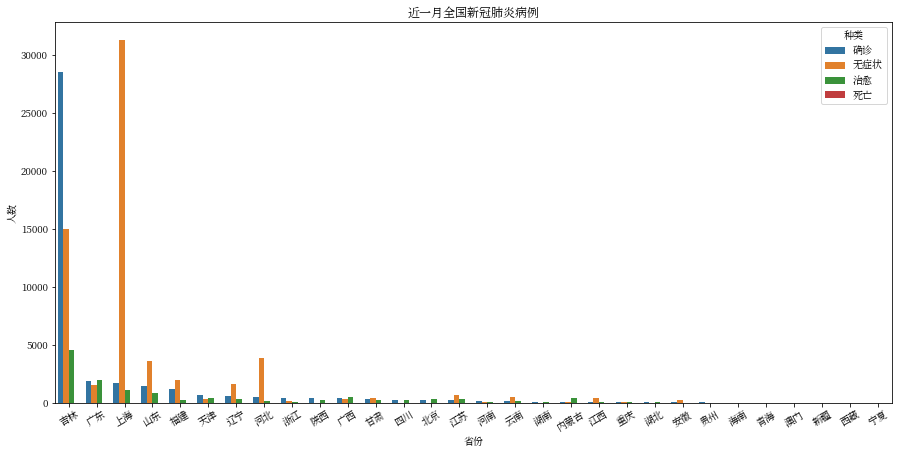

In [46]:
plt.figure(figsize=(15,7))
sns.barplot(x='省份',y='人数',hue='种类',data=province_info)
plt.title('近一月全国新冠肺炎病例')
plt.xticks(rotation=30)
plt.savefig('result/近一月全国新冠肺炎病例.png')


In [47]:
province_info = [[i['省份'],np.log2(i['人数']) if i['人数'] else 0] 
for j,i in province_info.iterrows() if i['种类']== '确诊']

In [48]:
def map_visulization():
    c = (
        Map(init_opts=opts.InitOpts())
        .add("log(确诊病例数)", province_info, "china")
        .set_series_opts(label_opts=opts.LabelOpts())
        .set_global_opts(title_opts=opts.TitleOpts(title="近一月全国新冠肺炎确诊病例"),
        visualmap_opts=opts.VisualMapOpts(max_=15))
        .render("result/近一月全国新冠肺炎确诊病例.html")
    )


In [49]:
map_visulization()